# Regresión Espacial

La regresión proporciona un caso perfecto para examinar cómo la estructura espacial puede ayudar a comprender y analizar los datos. En este taller, se analiza cómo se puede utilizar la estructura espacial para validar y mejorar los algoritmos de predicción, centrándose específicamente en la regresión lineal.

## *¿Qué* es la regresión espacial y *por qué* podría ser importante?

Por lo general, la estructura espacial ayuda a los modelos de regresión de dos maneras.

La primera forma en la que el espacio puede tener un impacto en los datos es cuando el proceso *que genera* los datos es en sí mismo explícitamente espacial. Se puede pensar en algo así como los precios de las viviendas unifamiliares. A menudo ocurre que las personas pagan una prima sobre el precio de su casa para poder vivir en un mejor distrito escolar por una casa de la misma calidad. Alternativamente, las casas más cercanas a contaminantes acústicos o químicos, como plantas de tratamiento de aguas residuales, instalaciones de reciclaje o autopistas anchas, pueden en realidad ser más baratas de lo que se anticiparía.

Independientemente del caso específico en juego, aquí la *geografía es una característica* dado que ayuda directamente a hacer predicciones sobre los resultados *porque esos resultados se obtienen a partir de procesos geográficos*.

Otra alternativa para incluir información en el análisis de métodos predictivos y clasificadores, a un analista le puede preocupar que el modelo prediga erróneamente *sistemáticamente* algunos tipos de observaciones. Si se sabe que el modelo rutinariamente funciona mal en un conjunto de observaciones, se podría hacer un modelo mejor si se puede identificar esto. 

 La geografía proporciona una incorporación excepcionalmente útil para evaluar la estructura de nuestros errores. Graficar los errores de clasificación/predicción en un mapa puede ayudar a mostrar si hay o no *grupos de errores* en los datos. Si *se sabe* que los errores tienden a ser mayores en algunas áreas que en otras (o si el error es "contagioso" entre observaciones), entonces se podría explotar esta estructura para hacer mejores predicciones.

La estructura espacial en nuestros errores puede surgir cuando la geografía *debería ser* un atributo de alguna manera, pero no se está seguro exactamente de cómo incluirla en el modelo. También podrían surgir porque hay alguna *otra* característica cuya omisión causa los patrones espaciales en el error que se observa, si se incluyera esta característica adicional, la estructura desaparecería.

O podría surgir de las complejas interacciones e interdependencias entre las características que se han elegido como predictores, lo que da como resultado una estructura intrínseca en la predicción errónea.  La mayoría de los predictores que se utilizan en modelos de procesos sociales contienen información espacial *incorporada*: patrones intrínsecos a la característica que obtenemos de forma gratuita en el modelo.

Si se pretende o no, el uso de un predictor con patrones espaciales en un modelo puede dar como resultado errores con patrones espaciales, usar más de uno puede amplificar este efecto. 
Por lo tanto, *independientemente de si el verdadero proceso es explícitamente geográfico o no*, información adicional sobre las relaciones espaciales entre las observaciones o más información sobre sitios cercanos puede mejorar las predicciones.

En este taller, se incorpora el espacio al marco de regresión tradicional. Se comienza con un modelo de regresión lineal estándar, desprovisto de cualquier referencia geográfica. A partir de ahí, se formaliza el espacio y las relaciones espaciales de tres maneras principales: primero, codificándolo en variables exógenas, en segundo lugar, a través de la heterogeneidad espacial o como una variación sistemática de los resultados en el espacio, tercero, como dependencia, o mediante el efecto asociado a las características de los vecinos espaciales. En todo momento, centrándose en las diferencias conceptuales que implica cada enfoque más que en los detalles técnicos.

## Regresión clásica (no espacial), un repaso muy rápido

Antes de discutir cómo incluir explícitamente el espacio en el marco de regresión lineal, se muestra cómo se puede llevar a cabo la regresión básica en Python y cómo se pueden comenzar a interpretar los resultados.

La idea central de la regresión lineal es explicar la variación en una variable dada (*dependiente*) como una función lineal de un conjunto de otras variables (*explicatorias*). Por ejemplo, en este caso, se puede querer expresar el precio de una casa en función del número de dormitorios que tiene y de si es condominio o no. A nivel individual, se puede expresar esto como:

$$
y_i = \alpha + \sum_k \beta_k \mathbf{X}_{ik}  + \epsilon_i
$$

Por ejemplo, en este caso, se puede querer expresar el precio de una casa en función del número de dormitorios que tiene y de si es condominio o no. A nivel individual, se puede expresar esto como:

$$
P_i = \alpha + \sum_k \beta_k \mathbf{X}_{ik}  + \epsilon_i
$$

donde $P_i$ es el precio de Airbnb de la casa $i$, y $X$ es un conjunto de covariables que se usan para explicar dicho precio (por ejemplo, cantidad de habitaciones y variable binaria de condominio). $\beta$ es un vector de parámetros que nos dan información sobre de qué manera y en qué medida cada variable está relacionada con el precio, y $\alpha$, el término constante, es el precio medio de la vivienda cuando todas las demás variables son cero. El término $\epsilon_i$ generalmente se conoce como "error" y captura elementos que influyen en el precio de una casa pero que no están incluidos en $X$.

El objetivo cuando se entrena un modelo de regresión es estimar los parámetros $\alpha$ y $\beta_k$ para predecir los valores de $y$

En la práctica, existen varios paquetes en Python que permiten entrenar modelos de regresión, algunos de estos son:  `statsmodels`, `scikit-learn` y `pysal`. En este taller se hace uso del módulo `spreg` en Pysal:

## Dataset: San Diego Airbnb

En este taller se examinará información sobre propiedades de Airbnb en San Diego, California en Estados Unidos. Este conjunto de datos se basa en el extracto de San Diego del 2024-03-25 de [Inside Airbnb](http://insideairbnb.com/).

In [1]:
from pathlib import Path
import requests

DATA_PATH = Path().cwd().parent.parent.absolute() / "data"

Listado de propiedades:

In [2]:
# Listings

url = "https://data.insideairbnb.com/united-states/"\
    "ca/san-diego/2024-03-25/data/listings.csv.gz"

listings_path = DATA_PATH / "listings.csv.gz"

response = requests.get(url)

with open(listings_path, "wb") as file:
    file.write(response.content)

Vecindarios

In [3]:
url =  "https://data.insideairbnb.com/united-states"\
    "ca/san-diego/2024-03-25/visualisations/neighbourhoods.geojson"

neighbourhoods_path = DATA_PATH / "neighbourhoods.geojson"

response = requests.get(url)

with open(neighbourhoods_path, "wb") as file:
    file.write(response.content)

Configuración de variables

In [4]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
listings = pd.read_csv(listings_path)

In [6]:
print(f"Total columns: {listings.shape[1]}\n")

for column in listings.columns:
    print(column)

Total columns: 75

id
listing_url
scrape_id
last_scraped
source
name
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
latitude
longitude
property_type
room_type
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review

Columnas de interés:

* accommodates: Cantidad de personas que puede acoger
* amenities: Comodidades que ofrece el alojamiento
* bathrooms: Cantidad de baños
* bedrooms: Cantidad de cuantos
* beds: Cantidad de camas disponibles
* latitude: Latitud
* Longitude: Longitud
* neighbourhood_cleansed: Vecindario
* property_type: Tipo de propiedad
* price: Precio del alojamiento (variable objetivo)
* room_type: Tipo de habitación

In [7]:
listings = listings[
    [
        "accommodates",
        "amenities",
        "bathrooms",
        "beds",
        "latitude",
        "longitude",
        "neighbourhood_cleansed",
        "property_type",
        "price",
        "room_type"
    ]
]

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11496 entries, 0 to 11495
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   accommodates            11496 non-null  int64  
 1   amenities               11496 non-null  object 
 2   bathrooms               11229 non-null  float64
 3   beds                    11203 non-null  float64
 4   latitude                11496 non-null  float64
 5   longitude               11496 non-null  float64
 6   neighbourhood_cleansed  11496 non-null  object 
 7   property_type           11496 non-null  object 
 8   price                   11230 non-null  object 
 9   room_type               11496 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 898.3+ KB


Variable dependiente: Precio

In [8]:
listings["price"].head(10)

0    $274.00
1    $231.00
2    $163.00
3     $87.00
4    $102.00
5    $179.00
6     $71.00
7    $226.00
8    $914.00
9    $811.00
Name: price, dtype: object

In [9]:
listings["price"] = listings["price"].str.lstrip("$").str.replace(",", "").astype(float)

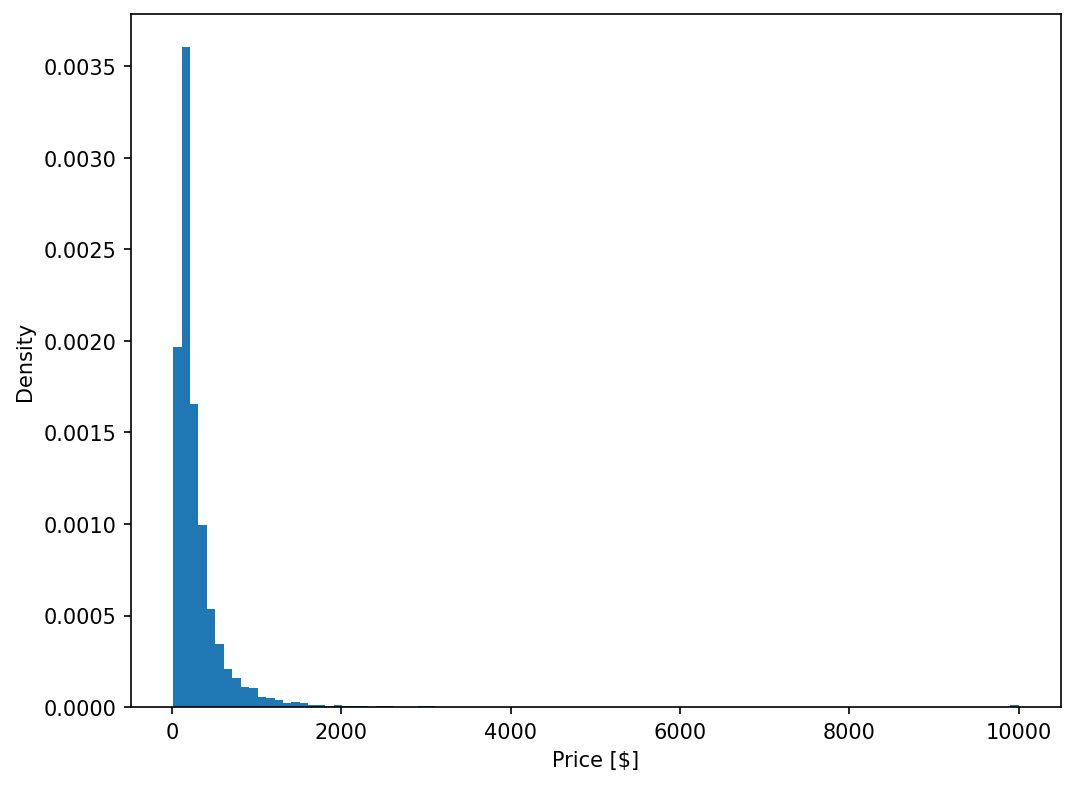

In [10]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist(listings["price"], density=True, bins=100)
ax.set(
    ylabel="Density",
    xlabel="Price [$]"
)
plt.show()

En Machine Learning, se puede utilizar tranformación de las variables para normalizar datos, reducir el impacto de valores atípicos y hacer que los datos sean más adecuados para ciertos tipos de análisis. En este caso, se aplica una transformación logarítmica para reducir la escala del precio.

In [11]:
listings["log_price"] = np.log(listings["price"])

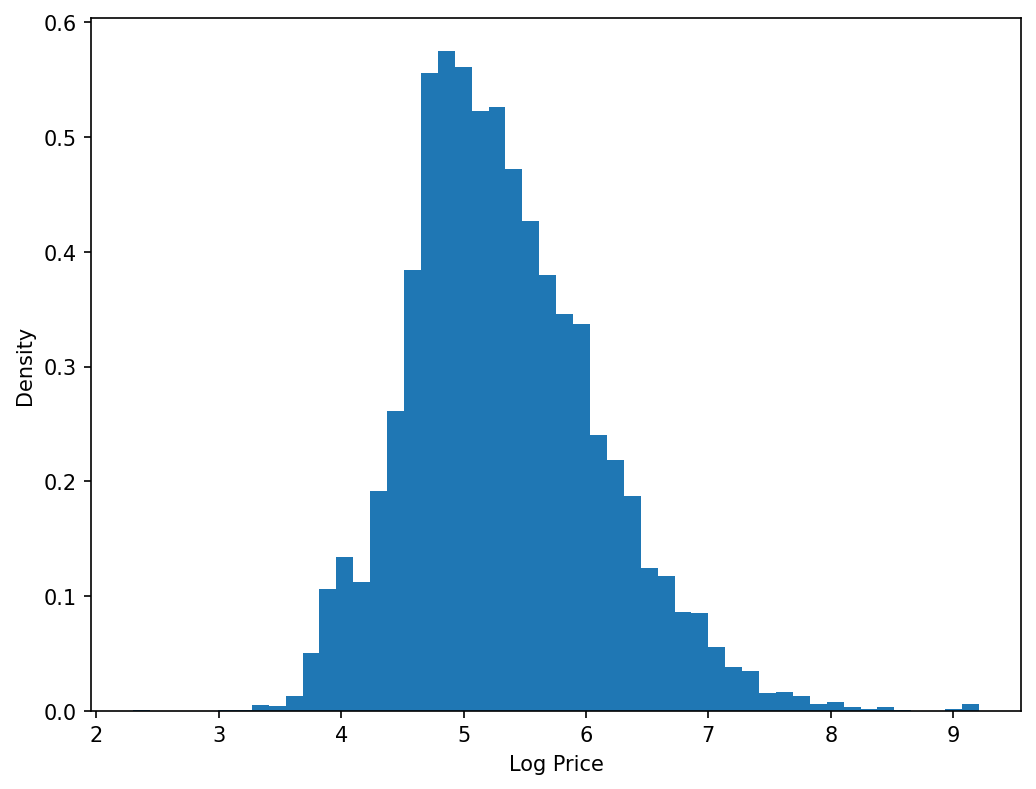

In [12]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.hist(listings["log_price"], density=True, bins=50)
ax.set(
    ylabel="Density",
    xlabel="Log Price"
)
plt.show()

Amenities

In [13]:
for amenity in listings["amenities"].unique()[:10]:
    print(amenity)

["Free dryer \u2013 In unit", "Cooking basics", "Children\u2019s dinnerware", "Laundromat nearby", "Oven", "Coffee", "Ethernet connection", "Fire pit", "Baby monitor", "Blender", "Children's playroom", "Wine glasses", "Private backyard \u2013 Fully fenced", "Central air conditioning", "Dishes and silverware", "Private entrance", "Bed linens", "Smoke alarm", "Coffee maker: Keurig coffee machine, pour-over coffee", "Toaster", "Wifi", "Free parking on premises", "Ceiling fan", "Luggage dropoff allowed", "Cleaning products", "Shower gel", "Children\u2019s bikes", "Portable fans", "Extra pillows and blankets", "Children\u2019s books and toys", "Self check-in", "Essentials", "Iron", "Microwave", "First aid kit", "75\" HDTV with Amazon Prime Video, Apple TV, Disney+, HBO Max, Hulu, Netflix", "Pack \u2019n play/Travel crib - available upon request", "Dishwasher", "Freezer", "Heating", "Hot water", "Barbecue utensils", "Bathtub", "Hair dryer", "Books and reading material", "Pets allowed", "Crib

In [14]:
# Convert string in lists
listings["amenities"] = listings["amenities"].apply(ast.literal_eval)

In [15]:
listings["amenities"][0]

['Free dryer – In unit',
 'Cooking basics',
 'Children’s dinnerware',
 'Laundromat nearby',
 'Oven',
 'Coffee',
 'Ethernet connection',
 'Fire pit',
 'Baby monitor',
 'Blender',
 "Children's playroom",
 'Wine glasses',
 'Private backyard – Fully fenced',
 'Central air conditioning',
 'Dishes and silverware',
 'Private entrance',
 'Bed linens',
 'Smoke alarm',
 'Coffee maker: Keurig coffee machine, pour-over coffee',
 'Toaster',
 'Wifi',
 'Free parking on premises',
 'Ceiling fan',
 'Luggage dropoff allowed',
 'Cleaning products',
 'Shower gel',
 'Children’s bikes',
 'Portable fans',
 'Extra pillows and blankets',
 'Children’s books and toys',
 'Self check-in',
 'Essentials',
 'Iron',
 'Microwave',
 'First aid kit',
 '75" HDTV with Amazon Prime Video, Apple TV, Disney+, HBO Max, Hulu, Netflix',
 'Pack ’n play/Travel crib - available upon request',
 'Dishwasher',
 'Freezer',
 'Heating',
 'Hot water',
 'Barbecue utensils',
 'Bathtub',
 'Hair dryer',
 'Books and reading material',
 'Pets a

In [16]:
listings["has_pool"] = listings["amenities"].apply(lambda x: any("pool" in amenity.lower() for amenity in x))

In [22]:
listings["has_pool"].head()

0    False
1    False
2    False
3    False
4    False
Name: has_pool, dtype: bool

In [24]:
print(f"Number of properties with pool: {listings['has_pool'].sum()}")

Number of properties with pool: 2249
